# Project Choice #1
This is a regression problem. You have to predict "Rating".

You should split the data into train, valid and test. Use a seed (of your choice) to make your experiments more reproducible. Alternatively, you can split into just train and test, and then use cross-validation.

In [0]:
# !pip install h2o
# # Load the H2O library and start up the H2O cluter locally on your machine
# import h2o

# # Number of threads, nthreads = -1, means use all cores on your machine
# # max_mem_size is the maximum memory (in GB) to allocate to H2O
# h2o.init(nthreads = -1, max_mem_size = 8)

In [0]:
h2o.init()

h2o.remove_all  # clean slate, in case cluster was already running

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_bisp6j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


<function h2o.h2o.remove_all>

## Step one
Step one is to start h2o, load your data set, and split it if necessary. By the end of this stage you should have three variables, pointing to three data frames on h2o: train, valid, test. However, if you are choosing to use cross-validation, you will only have two: train and test.

In [0]:
data = h2o.import_file(path="http://coursera.h2o.ai/cacao.882.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
data.head()

Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,0.7,France,2.75,,Togo
A. Morin,Atsane,1676,2015,0.7,France,3,,Togo
A. Morin,Akata,1680,2015,0.7,France,3.5,,Togo
A. Morin,Quilla,1704,2015,0.7,France,3.5,,Peru
A. Morin,Carenero,1315,2014,0.7,France,2.75,Criollo,Venezuela
A. Morin,Cuba,1315,2014,0.7,France,3.5,,Cuba
A. Morin,Sur del Lago,1315,2014,0.7,France,3.5,Criollo,Venezuela
A. Morin,Puerto Cabello,1319,2014,0.7,France,3.75,Criollo,Venezuela
A. Morin,Pablino,1319,2014,0.7,France,4,,Peru


In [0]:
splits = data.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [0]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)

1276
247
272


## Step two
Step two is to set x to be the list of columns you will use to train on, to be the column you will learn. Your choice of y decides if it will be a classification or a regression.

In [0]:
data.columns

['Maker',
 'Origin',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Maker Location',
 'Rating',
 'Bean Type',
 'Bean Origin']

In [0]:
y = 'Rating'
x = list(data.columns)

In [0]:
x.remove(y) #remove the response

## Step three 
Step three is to create a baseline deep learning model. It is recommended to use all default settings (remembering to specify either nfolds or validation_frame); if you want to use different settings you should include a comment in your source file justifying this. Allowable reasons are that the default settings were taking too long on your hardware, or that they were over-fitting. Your script must include timing code.



### Train a default DL

In [0]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [0]:
# Initialize and train the DL estimator:

dl_fit1 = H2ODeepLearningEstimator(model_id='dl_fit1', seed=1)
dl_fit1.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


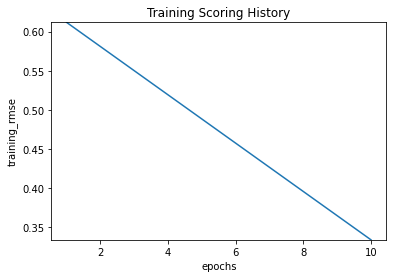

In [0]:
dl_fit1.plot()

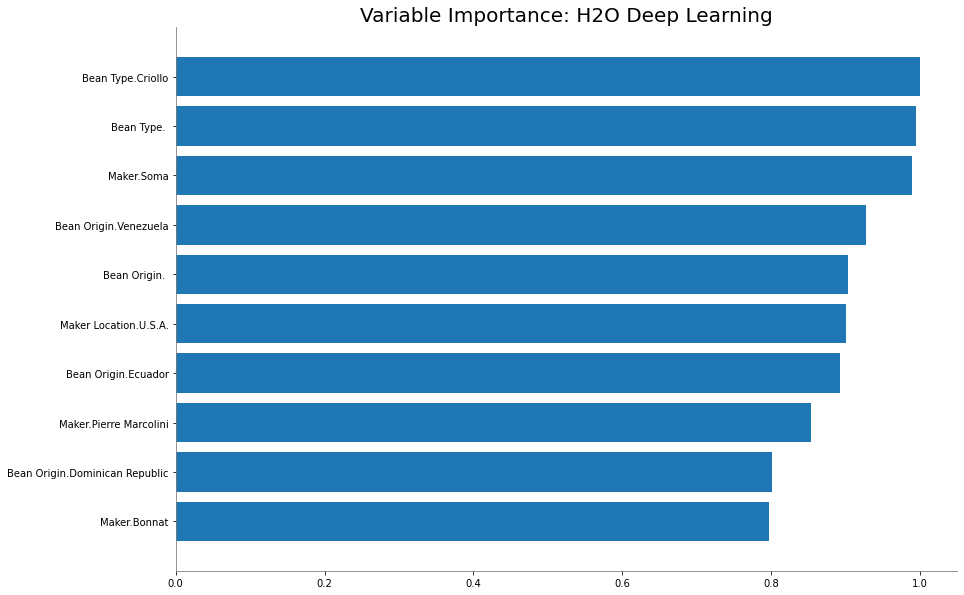

In [0]:
dl_fit1.varimp_plot()

## Step four 
Step four is to produce a tuned model, that gives superior performance. However you should use no more than 10 times the running time of your baseline model, so again your script should be timing the model.

### Train a DL with new architecture and more epochs

In [0]:
dl_fit2 = H2ODeepLearningEstimator(model_id='dl_fit2', 
                                   epochs=20, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl_fit2.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


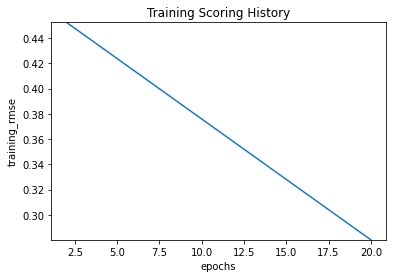

In [0]:
dl_fit2.plot()

### Train a DL with early stopping

In [0]:
dl_fit3 = H2ODeepLearningEstimator(model_id='dl_fit3', 
                                   epochs=20, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='RMSE',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


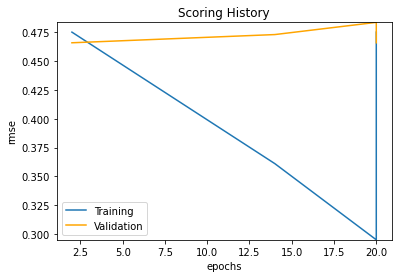

In [0]:
dl_fit3.plot()

### Compare model performance

In [0]:
dl_perf1 = dl_fit1.model_performance(test)
dl_perf2 = dl_fit2.model_performance(test)
dl_perf3 = dl_fit3.model_performance(test)

In [0]:
print(dl_perf1)
print(dl_perf2)
print(dl_perf3)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.1966581087564716
RMSE: 0.4434615076378914
MAE: 0.3512554036727225
RMSLE: 0.11230843551996846
Mean Residual Deviance: 0.1966581087564716


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.23708913287845831
RMSE: 0.48691799399740643
MAE: 0.37371775018643716
RMSLE: 0.12461601028329773
Mean Residual Deviance: 0.23708913287845831


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.2436882909992023
RMSE: 0.49364794236297826
MAE: 0.39378823969956905
RMSLE: 0.12399866581486788
Mean Residual Deviance: 0.2436882909992023



In [0]:
print("Best deep learning model1 R2: %.4f" % (dl_fit1.r2()))
print("Best deep learning model2 R2: %.4f" % (dl_fit2.r2()))
print("Best deep learning model3 R2: %.4f" % (dl_fit3.r2()))

Best deep learning model1 R2: 0.5060
Best deep learning model2 R2: 0.6521
Best deep learning model3 R2: 0.0000


### Grid Search

In [0]:
# ### 3. Deep Learning Algorithm



activation_opt = ["RectifierWithDropout",
                  "TanhWithDropout"]
#L1 & L2 regularization
l1_opt = [0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]

l2_opt = [0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]

In [0]:
# Create the Hyperparameters
dl_params = {
             'activation': activation_opt,
             "input_dropout_ratio" : [0,0.05, 0.1],  # input layer dropout ratio to improve generalization. Suggested values are 0.1 or 0.2.
             'l1': l1_opt,
             'l2': l2_opt,
             'hidden_dropout_ratios':[[0.1,0.2,0.3], # hidden layer dropout ratio to improve generalization: one value per hidden layer.
                                      [0.1,0.5,0.5],
                                      [0.5,0.5,0.5]]
             }

In [0]:
search_criteria = {
                   'strategy': 'RandomDiscrete',
                   'max_runtime_secs': 1000,
                   'seed':1
                   }

In [0]:
from h2o.grid.grid_search import H2OGridSearch

In [0]:
# Prepare the grid object
dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator(
                                                    epochs = 1000,   ## hopefully converges earlier...
                                                    adaptive_rate = True,  # http://cs231n.github.io/neural-networks-3/#sgd
                                                    stopping_metric="AUTO",
                                                    stopping_tolerance=1e-2,    ## stop when misclassification does not improve by >=1% for 2 scoring events
                                                    stopping_rounds=3,
                                                    hidden=[128,128,128],      ## more hidden layers -> more complex interactions
                                                    balance_classes= False,
                                                    standardize = True,  # If enabled, automatically standardize the data (mean 0, variance 1). If disabled, the user must provide properly scaled input data.
                                                    loss = "quantile"  # quantile for regression
                                                    ),
                        grid_id='dl_grid',
                        hyper_params=dl_params,
                        search_criteria=search_criteria)


In [0]:
# Train the Model 
dl_grid.train(x=x,y=y, 
                training_frame=train,
                validation_frame=valid,
                stopping_rounds=2,
                stopping_tolerance=0.0005,
                seed=1
                )

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [0]:
# Find the Model performance 
dl_gridperf = dl_grid.get_grid(sort_by='RMSE',decreasing = False)
dl_gridperf

                activation  ...         model_ids                 rmse
0     RectifierWithDropout  ...  dl_grid_model_21  0.43963757200395154
1     RectifierWithDropout  ...   dl_grid_model_3  0.43969224893064607
2     RectifierWithDropout  ...  dl_grid_model_27  0.44202366532084997
3     RectifierWithDropout  ...  dl_grid_model_18  0.44559150940565145
4     RectifierWithDropout  ...  dl_grid_model_28   0.4462683089518869
5     RectifierWithDropout  ...  dl_grid_model_17   0.4542910253170559
6          TanhWithDropout  ...  dl_grid_model_20   0.4571345300707123
7          TanhWithDropout  ...  dl_grid_model_34    0.457688816627987
8          TanhWithDropout  ...   dl_grid_model_8   0.4584004758578767
9          TanhWithDropout  ...  dl_grid_model_13  0.45948549833099195
10         TanhWithDropout  ...  dl_grid_model_12  0.46044564224804885
11         TanhWithDropout  ...   dl_grid_model_1   0.4618126764214621
12    RectifierWithDropout  ...   dl_grid_model_6   0.4624507626973451
13    

In [0]:
# Identify the best model generated with least error
best_dl_model = dl_gridperf.models[0]
best_dl_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl_grid_model_21


Status of Neuron Layers: predicting Rating, regression, quantile distribution, Quantile loss, 246,145 weights/biases, 2.9 MB, 59,874 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,1663,Input,0,,,,,,,,,
1,,2,128,RectifierDropout,10,1e-05,0,0.240381,0.385161,0,-0.000126946,0.0422272,0.0752932,0.23434
2,,3,128,RectifierDropout,50,1e-05,0,0.103494,0.0428007,0,-0.0222852,0.100792,0.877607,0.0853134
3,,4,128,RectifierDropout,50,1e-05,0,0.0984103,0.123797,0,-0.0216822,0.0955702,0.889312,0.0609968
4,,5,1,Linear,,1e-05,0,0.00255746,0.000956825,0,-0.00226132,0.0650909,0.0652159,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.0980078908179633
RMSE: 0.31306211974297254
MAE: 0.2346810749162339
RMSLE: 0.08073193652290533
Mean Residual Deviance: 0.11734053745811696

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.1932811947175297
RMSE: 0.43963757200395154
MAE: 0.3483090451350913
RMSLE: 0.11007777198628049
Mean Residual Deviance: 0.17415452256754566

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2020-05-11 08:28:28,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-05-11 08:28:28,9 min 30.268 sec,1422 obs/sec,0.822884,1,1050.0,0.488803,0.193474,0.386948,-0.057771,0.488256,0.193544,0.387088,-0.101771
2,,2020-05-11 08:28:35,9 min 37.162 sec,1677 obs/sec,9.176332,11,11709.0,0.455616,0.180648,0.361297,0.080988,0.467729,0.184704,0.369408,-0.011078
3,,2020-05-11 08:28:42,9 min 44.130 sec,1761 obs/sec,18.399687,22,23478.0,0.369497,0.139865,0.279731,0.395571,0.444071,0.176265,0.352529,0.088620
4,,2020-05-11 08:28:49,9 min 50.816 sec,1818 obs/sec,27.634013,33,35261.0,0.313062,0.117341,0.234681,0.566104,0.439638,0.174155,0.348309,0.106726
5,,2020-05-11 08:28:55,9 min 57.111 sec,1877 obs/sec,36.856583,44,47029.0,0.269748,0.095298,0.190596,0.677863,0.449554,0.177198,0.354395,0.065975
6,,2020-05-11 08:29:02,10 min 3.807 sec,1923 obs/sec,46.923197,56,59874.0,0.264339,0.098744,0.197488,0.690652,0.447489,0.176250,0.352500,0.074535
7,,2020-05-11 08:29:03,10 min 4.440 sec,1921 obs/sec,46.923197,56,59874.0,0.313062,0.117341,0.234681,0.566104,0.439638,0.174155,0.348309,0.106726



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Maker.Pralus,1.000000,1.000000,0.001650
1,Maker.Soma,0.975563,0.975563,0.001610
2,Maker.Amedei,0.972269,0.972269,0.001605
3,Cocoa Percent,0.921537,0.921537,0.001521
4,Maker.Patric,0.854808,0.854808,0.001411
5,Maker Location.Spain,0.837840,0.837840,0.001383
6,Maker.Arete,0.831736,0.831736,0.001373
7,Maker.Rogue,0.822172,0.822172,0.001357
8,Maker.Cacao Sampaka,0.803912,0.803912,0.001327
9,Maker.Alain Ducasse,0.796226,0.796226,0.001314



See the whole table with table.as_data_frame()


In [0]:
best_dl_perf = best_dl_model.model_performance(test)   # deep Learning Model

In [0]:
print(best_dl_perf)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.18768438695030687
RMSE: 0.4332255612845425
MAE: 0.3429761503940244
RMSLE: 0.10991864243584253
Mean Residual Deviance: 0.1714880751970122



In [0]:
print("Best dl R2: %.4f" % (best_dl_perf.r2()))

Best dl R2: 0.2503


## Step five
Step five is to save both your models, to your local disk, and they should be submitted with your script. Use saveModel() (in R) or save_model() (Python), to export the binary version of the model. (Do not export a POJO.)



### Save/Download a basedline deep learning model

In [0]:
# save the model
model_path = h2o.save_model(model=dl_fit1, path="/tmp/mymodel", force=True)

In [0]:
print(model_path)

/tmp/mymodel/dl_fit1


In [0]:
# load the model
saved_model = h2o.load_model(model_path)

In [0]:
# import os
# from google.colab import drive
# drive.mount('/content/gdrive')
# !pwd
# os.chdir('gdrive/My Drive/Colab Notebooks')
# !pwd

In [0]:
# download the model built above to your local machine
my_local_model = h2o.download_model(dl_fit1, path="/Users/Downloads")

In [0]:
# upload the model that you just downloded above
# to the H2O cluster
uploaded_model = h2o.upload_model(my_local_model)

### Save/Download a tuned deep learning model

In [0]:
# save the model
model_path = h2o.save_model(model=dl_fit2, path="/tmp/mymodel", force=True)

In [0]:
print(model_path)

/tmp/mymodel/dl_fit2


In [0]:
# load the model
saved_model = h2o.load_model(model_path)

In [0]:
# download the model built above to your local machine
my_local_model = h2o.download_model(dl_fit2, path="/Users/Downloads")

In [0]:
# upload the model that you just downloded above
# to the H2O cluster
uploaded_model = h2o.upload_model(my_local_model)

## Step six
Step six is to save your script, shutdown h2o, and run your script again in a fresh session to be sure the results are reproducible, and that there are no bugs. This is a very important step: scripts that do not run might fail to be graded.

In [0]:
h2o.cluster().shutdown()

H2O session _sid_bc53 closed.


In [0]:
h2o.shutdown(prompt=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.
